# Labeled Faces In The Wild Deep Learning Classification


## Description


## Initialization


## Load dataset

In [15]:
from sklearn.datasets import fetch_lfw_people

# Load dataset in grayscale centered on the faces
lfw_people = fetch_lfw_people(min_faces_per_person=5, color=False, resize=1.0, slice_=(slice(70, 195), slice(78, 172)))

X = lfw_people.images
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]
n_samples, h, w = lfw_people.images.shape

## Show images infos

In [16]:
print(f"Image dimensions: {w}x{h}x{1}")
print("Number of classes: {n_classes}")
print("Number of samples: {n_samples}")
# print("Dataset head: ")
# print(X.head())
# X.info()

Image dimensions: 94x125x1
Number of classes: {n_classes}
Number of samples: {n_samples}


## Plot images

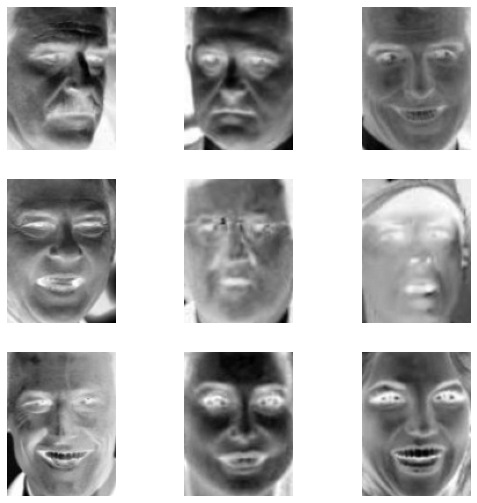

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i, 0:].reshape(h, w), cmap=plt.cm.gray_r)
    plt.axis("off")
plt.show()


## Split dataset


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## PCA dimensions reduction

In [ ]:
from sklearn.decomposition import PCA

n_components = 150

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
